# Project: Investigate alcohol consumption
## Table of contents
 - <a href="#intro">Introduction</a>
 - <a href="#wrangle">Data wrangling and cleaning</a>
 - <a href="#explore">Exploratory analysis</a>
 - <a href="#discussion">Discussion</a>

<a id="intro"></a>
## Introduction

For my analysis project, I choose the "Gapminder World" dataset. After examining the available variables, I choose *"Alcohol consumption per adult"* indicator as the dependent variable and the following three as the independent variable: 

 - *"Prevalence of current tobacco use among adults (>=15 years) (%, both sexes)"*
 - *"Income per person (fixed 2000 US\$)"*
 - *"Total 15+ unemployed (%)"*

After an initial examination, I found that the matrix of measurements are extremely sparse, but in 2005 many countries have a value, so I decided to take only this year into account.

Using these variables, I decided to research this three questions:

 1. "How does the economy of a country relate to alcohol consumption?"
 2. "Is there any connection between addiction to alcohol and tobacco?"
 3. "Where is Hungary - my home country - on these lists and what can we say about it compared to other countries?"

In [71]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Magic word for plots
%matplotlib inline

# Define basic variables
DATA_DIR = 'ds'
FILE_NAMES = ['alcohol', 'smoking', 'income', 'unemployment']

In [5]:
# Utility function definitions


<a id="wrangle"></a>
## Data wrangling and cleaning

### Loading data
As a first step, I read in the datasets with pandas into dataframe and put them in a single list. I used the name of the country as index and the name of the file as column name.

In [72]:
df_list = []
for fname in FILE_NAMES :
    full_path = DATA_DIR + '/' + fname + '.csv'
    df = pd.read_csv(full_path, index_col=0, header=0, sep=',')
    df_list.append(df)

After that, I joined the dataframes by the name of the country.

In [73]:
df = pd.concat(df_list, axis=1)

### Cleaning
I wanted to use the same dataset for all of my three questions. But, different countries had different missing values. To preserve the consistency, I decided to retain only those countries for which I had a value for all four indicators.

In [74]:
print('Total number of countries: {}'.format(len(df)))
df = df[~(df.isnull().any(axis=1))]
print('Number of countries after missing value removal: {}'.format(len(df)))

Total number of countries: 295
Number of countries after missing value removal: 24


I was curious about which countries remained, so I printed out them:

In [75]:
print(', '.join(list(df.index)))

Australia, Canada, Estonia, Finland, France, Germany, Ireland, Japan, Latvia, Lithuania, Netherlands, New Zealand, Norway, Philippines, Poland, Portugal, Romania, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom, United States


### Handling possible outliers

I know that all country in my dataset has all four measurement. But is there any outlier which we need to handle?
I drew a histogram for each variable and looked at them.

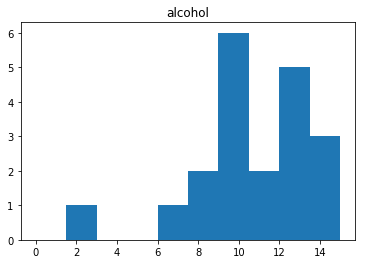

In [102]:
hist1 = df.loc[:, FILE_NAMES[0]].hist(grid=False, bins=10, range=(0,15))
hist1 = plt.title(FILE_NAMES[0])

On this histogram I can see one outlier where the yearly consumption fall far from the other values. I selected this country by value:

In [93]:
outlier_country = list(df.loc[df.loc[:,'alcohol'] < 5].index)
print('Outlier country based on alcohol consumption: ' + ', '.join(outlier_country))

Outlier country based on alcohol consumption: Turkey


I examined the three independent variable too the same way.

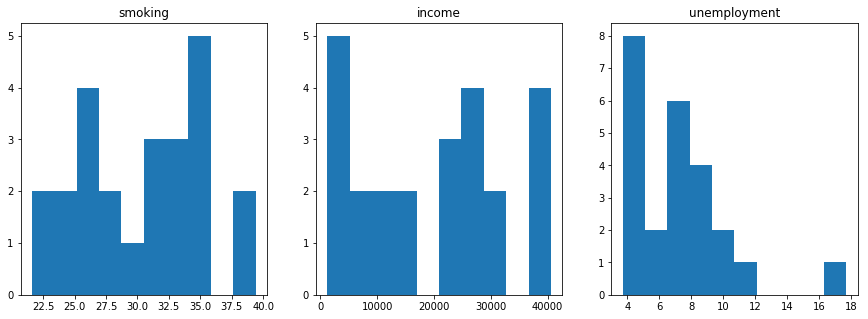

In [84]:
histogram_list = [[] for i in range(0, 3)]
plt.figure(figsize=(15,5))
for i in range(1, 4) :
    plt.subplot(1, 3, i)
    histogram_list[i-1] = df.loc[:, FILE_NAMES[i]].hist(grid=False)
    plt.title(FILE_NAMES[i])

In [91]:
smoking_outlier = list(df.loc[df.loc[:, 'smoking']>35].index)
print('Outlier countries based on smoking: ' + ', '.join(smoking_outlier))

Outlier countries based on smoking: Estonia, Latvia, Poland, Portugal, Turkey, United Kingdom


In [92]:
unemp_outlier = list(df.loc[df.loc[:, 'unemployment']>15].index)
print('Outlier countries based on unemployment ratio: ' + ', '.join(unemp_outlier))

Outlier countries based on unemployment ratio: Poland


Looking at the histogram, I didn't consider any country as outlier based on income. I think these outlier values don't seem to be invalid or erroneous I decided to retain them in my analysis.

### General properties of dataset

After initial cleaning I performed some simple descriptive statistic measurement.

In [114]:
import scipy.stats as sts

In [122]:
sts.kstest(df.values[:, 3], 'norm')

KstestResult(statistic=0.9998922002867846, pvalue=0.0)

In [104]:
df.mean()

alcohol            11.455417
smoking            30.558333
income          19787.642021
unemployment        7.354167
dtype: float64

In [106]:
df.std()

alcohol             3.185336
smoking             5.117652
income          12783.649880
unemployment        3.056281
dtype: float64

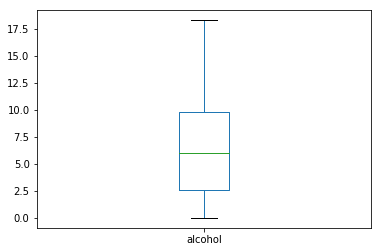

In [38]:
#df.loc[:, 'alcohol'].hist(range=(0,20), bins=40, grid=False)
df.boxplot('alcohol', grid=False)

In [48]:
quantiles = df.loc[:, 'alcohol'].quantile([0, 0.25, 0.5, 0.75, 1])

In [49]:
print(quantiles)

0.00     0.0200
0.25     2.5825
0.50     5.9900
0.75     9.7775
1.00    18.2800
Name: alcohol, dtype: float64


In [51]:
group_by_alcohol = {}
for i in range(1, 5) :
    group_by_alcohol[i] = df[quantiles[i-1]<=df.loc[:,'alcohol'] and df.loc[:,'alcohol']<quantiles[i]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<a id="explore"></a>
## Exploratory analysis

### Question one: How does the economy of a country relate to alcohol consumption?

### Question two: Is there any connection between addiction to alcohol and tobacco?

### Question three: Where is Hungary - my home country - on these lists and what can we say about it compared to other countries?

<a id="discussion"></a>
## Discussion